In [91]:
import pandas as pd

df1 = pd.read_excel('f_029df.xlsx')
df2 = pd.read_excel('f_9218df.xlsx')
df3 = pd.read_excel('f_18224df.xlsx')


In [92]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,dong,X,Y,highway,ffnc,ffc,nfnc,nfc,fsnc,fsc,nsnc,nsc,총생활인구수,affnc,affc,anfnc,anfc,afsnc,afsc,ansnc,ansc
0,0,0,가락1동,127.108235,37.495329,0.0,0.225806,0.000000,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.322362,0.077419,0.000000,0.00,0.000000,0.047561,0.022764,0.012,0.034783
1,1,1,가락2동,127.130643,37.495860,0.0,0.161290,0.166667,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.320622,0.038710,0.033333,0.01,0.033333,0.056098,0.043902,0.064,0.130435
2,2,2,가락본동,127.121640,37.497217,0.0,0.032258,0.000000,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.445918,0.045161,0.033333,0.01,0.033333,0.040244,0.040650,0.064,0.078261
3,3,3,가리봉동,126.888257,37.482555,0.0,0.032258,0.000000,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.108998,0.283871,0.000000,0.08,0.233333,0.293902,0.034146,0.392,0.234783
4,4,4,가산동,126.884341,37.476835,0.0,1.000000,0.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.562965,0.335484,0.000000,0.12,0.233333,0.343902,0.058537,0.408,0.286957


In [93]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1 = df1.drop('Unnamed: 0.1', axis = 1)
df1 = df1.drop('X', axis = 1)
df1 = df1.drop('Y', axis = 1)

df2 = df2.drop('Unnamed: 0', axis = 1)
df2 = df2.drop('Unnamed: 0.1', axis = 1)
df2 = df2.drop('X', axis = 1)
df2 = df2.drop('Y', axis = 1)

df3 = df3.drop('Unnamed: 0', axis = 1)
df3 = df3.drop('Unnamed: 0.1', axis = 1)
df3 = df3.drop('X', axis = 1)
df3 = df3.drop('Y', axis = 1)

In [94]:
# 총생활인구수를 마지막 칼럼에 위치하게 끔하겠습니다.
# 먼저 a로 총생활인구수 값들을 받아줍니다.
a = df2['총생활인구수'].values
type(a)

numpy.ndarray

In [95]:
# 총생활인구수 칼럼을 drop 시키고 population이라는 column을 추가합니다.
df2 = df2.drop('총생활인구수', axis = 1)
df2['population'] = a

In [96]:
df2.head()

,dong,highway,ffnc,ffc,nfnc,nfc,fsnc,fsc,nsnc,nsc,affnc,affc,anfnc,anfc,afsnc,afsc,ansnc,ansc,population
0,가락1동,NaN,0.225806,0.000000,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.077419,0.000000,0.00,0.000000,0.047561,0.022764,0.012,0.034783,0.155581
1,가락2동,NaN,0.161290,0.166667,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.038710,0.033333,0.01,0.033333,0.056098,0.043902,0.064,0.130435,0.154967
2,가락본동,NaN,0.032258,0.000000,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.045161,0.033333,0.01,0.033333,0.040244,0.040650,0.064,0.078261,0.264574
3,가리봉동,NaN,0.032258,0.000000,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.283871,0.000000,0.08,0.233333,0.293902,0.034146,0.392,0.234783,0.062857
4,가산동,NaN,1.000000,0.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.335484,0.000000,0.12,0.233333,0.343902,0.058537,0.408,0.286957,0.636785


In [97]:
# 전에 heatmap을 그린거 보면 ffc는 데이터가 너무 없어서 -값 내지는 매우 작은값을 보였다.
# 머신러닝돌릴때 ffc와 affc도 drop하자.
df2 = df2.drop('ffc', axis = 1)
df2 = df2.drop('affc', axis = 1)

In [98]:
# null값을 0으로 채워둡니다.
df2  = df2.fillna(0)

In [84]:
# 다중선형회귀 돌리기
# 먼저 데이터 셋을 트레인 셋과 test set으로 분리시키자.
from sklearn.model_selection import train_test_split
seed = 316
data = df2.values
x = data[:,1:16]
y = data[:,16]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = seed)


In [85]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

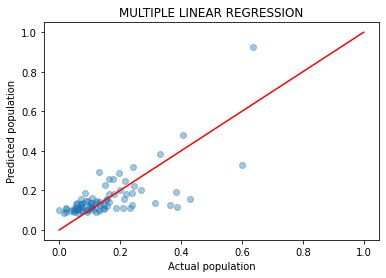

<Figure size 432x288 with 0 Axes>

In [75]:
y_predict = lin_reg.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
plt.savefig('LR1.jpg')
# feature가 너무 많아서 오차가 많이 발생하는 것 같습니다.

In [99]:
# 이번에는 전체 데이터 셋에 대해서 학습을 시킵시다.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

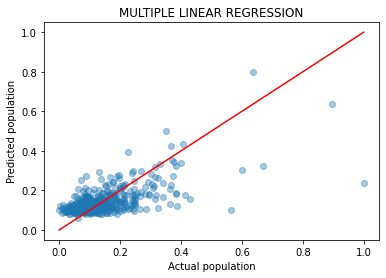

<Figure size 432x288 with 0 Axes>

In [102]:
y_predict = lin_reg.predict(x)
import matplotlib.pyplot as plt
plt.scatter(y, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()
plt.savefig('LR1.jpg')


In [86]:
# 주변동내 데이터를 삭제해봅시다.
# affnc	affc	anfnc	anfc	afsnc	afsc	ansnc	ansc	
df2 = df2.drop('affnc', axis = 1)
df2 = df2.drop('anfnc', axis = 1)
df2 = df2.drop('anfc', axis = 1)
df2 = df2.drop('afsnc', axis = 1)
df2 = df2.drop('afsc', axis = 1)
df2 = df2.drop('ansnc', axis = 1)
df2 = df2.drop('ansc', axis = 1)



In [87]:
df2.head()

,dong,highway,ffnc,nfnc,nfc,fsnc,fsc,nsnc,nsc,population
0,가락1동,0.0,0.225806,0.00,0.0,0.164634,0.000000,0.02,0.000000,0.155581
1,가락2동,0.0,0.161290,0.00,0.0,0.024390,0.016260,0.08,0.000000,0.154967
2,가락본동,0.0,0.032258,0.00,0.0,0.146341,0.154472,0.04,0.260870,0.264574
3,가리봉동,0.0,0.032258,0.05,0.0,0.006098,0.000000,0.74,0.000000,0.062857
4,가산동,0.0,1.000000,0.20,1.0,1.000000,0.065041,0.86,0.913043,0.636785


In [88]:
from sklearn.model_selection import train_test_split
seed = 316
data = df2.values
x = data[:,1:9]
y = data[:,9]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = seed)


In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

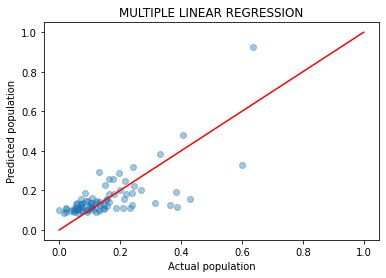

In [90]:
y_predict = lin_reg.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot([0,1],[0,1], c = 'red')
plt.xlabel("Actual population")
plt.ylabel("Predicted population")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.savefig('LR2.jpg')
plt.show()

